# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


# Loading the data

In [5]:
concrete_df=pd.read_excel('Concrete_Data.xls')
concrete_df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [6]:
#The names of the features are lengthy. so, I renamed those into shorter ones.

concrete_df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                   'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
                   'Fly Ash (component 3)(kg in a m^3 mixture)':'Ash',
                   'Water  (component 4)(kg in a m^3 mixture)':'Water',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)':'S_Plasticizer',
                   'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'C_Aggregate',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)':'F_Aggregate',
                   'Age (day)':'Age',
                   'Concrete compressive strength(MPa, megapascals) ':'Strength'},inplace=True)

# Shape of the data

In [7]:
concrete_df.shape

(1030, 9)

# List out the feature variables and their data-types

In [8]:
concrete_df.iloc[:,:-1].info(null_counts =False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Cement         float64
 1   Slag           float64
 2   Ash            float64
 3   Water          float64
 4   S_Plasticizer  float64
 5   C_Aggregate    float64
 6   F_Aggregate    float64
 7   Age            int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


### Observations:

1. There are 8 independent variables : <b>Cement, Slag, Ash, Water, S_Plasicizer, C_Aggregate, F_Aggregate, Age</b>.
2. Except Age, remaining features are of <b>Float</b> Dtype.
3. Age is <b>int</b> Dtype

# List out response variable and its data type

In [9]:
concrete_df[['Strength']].info(null_counts =False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 1 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Strength  float64
dtypes: float64(1)
memory usage: 8.2 KB


### Observations:

1. strength is the response feature and it is <b>Float</b> Dtype

# Check for null values in the feature variables

In [10]:
concrete_df.isnull().sum()

Cement           0
Slag             0
Ash              0
Water            0
S_Plasticizer    0
C_Aggregate      0
F_Aggregate      0
Age              0
Strength         0
dtype: int64

### Observations:

1. There are no null values in the DataFrame

In [11]:
concrete_df.describe()

,Cement,Slag,Ash,Water,S_Plasticizer,C_Aggregate,F_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Check for outliers

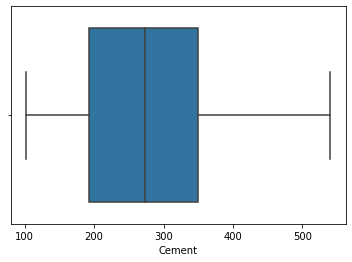

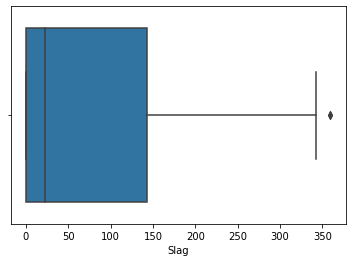

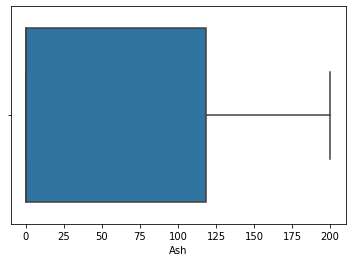

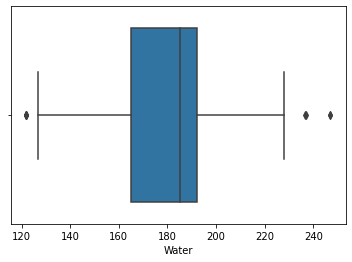

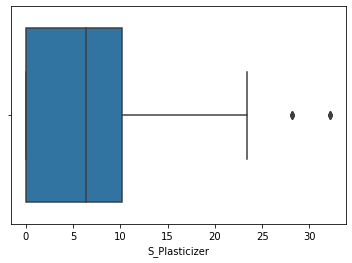

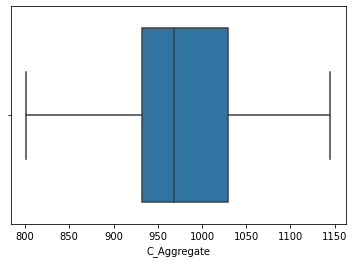

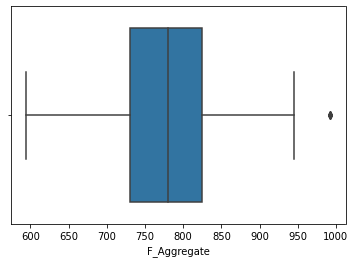

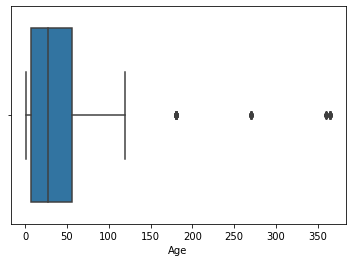

In [12]:
for col in concrete_df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(concrete_df[col])
    

### Observations:

1. By using boxplots we can visualize whether a feature has outliers or not.
2. The features <b> Slag, Water, S_Plasticizer, F_Aggregate, Age</b> have outliers.

# Treat outliers

### What is your strategy? 

I used <b>IQR</b> method to find Outliers. I replaced those with <b>Lower bound and Upper bound</b> values.    

### What other strategies can be used?

1. To find Outliers, We can use Z-Scores. Values which are 3$\sigma$ away from mean can be treated as outliers.
2. To replace outliers, we can replace with<br>
    a. Mean<br>
    b. Median<br>
    c. Mode<br>
    d. with any arbitary value<br>

In [13]:
df=concrete_df.copy()
outlier_col=['Slag', 'Water', 'S_Plasticizer', 'F_Aggregate', 'Age']

In [14]:
def outlier_remove(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    l_bound = q1 - 1.5 * iqr
    u_bound = q3 + 1.5 * iqr
    print('Column Name',col)
    print('Lower Bound is :',l_bound)
    print('Upper Bound is :',u_bound)
    
    # Replacing the outliers with each bounds
    df[col]=df[col].apply(lambda x:l_bound if x<l_bound else(u_bound if x>u_bound else x))
    outliers = [val for val in df[col] if val < l_bound or val > u_bound]
    
    print('Length of Outliers :',len(outliers))
    
    print("percentage:",len(outliers)/len(df[col])*100)
    
    return '**'



for col in outlier_col:
    print(outlier_remove(df,col))

Column Name Slag
Lower Bound is : -214.42499999999998
Upper Bound is : 357.375
Length of Outliers : 0
percentage: 0.0
**
Column Name Water
Lower Bound is : 124.25000000000001
Upper Bound is : 232.64999999999998
Length of Outliers : 0
percentage: 0.0
**
Column Name S_Plasticizer
Lower Bound is : -15.24
Upper Bound is : 25.4
Length of Outliers : 0
percentage: 0.0
**
Column Name F_Aggregate
Lower Bound is : 591.3750000000001
Upper Bound is : 963.5749999999999
Length of Outliers : 0
percentage: 0.0
**
Column Name Age
Lower Bound is : -66.5
Upper Bound is : 129.5
Length of Outliers : 0
percentage: 0.0
**


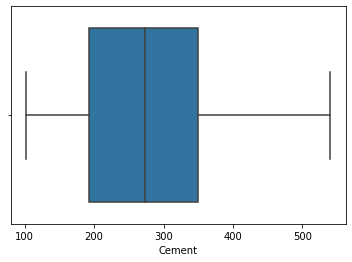

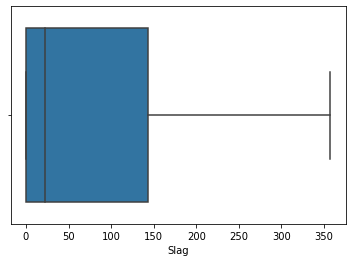

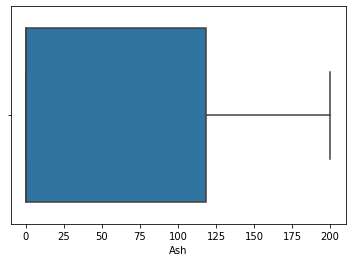

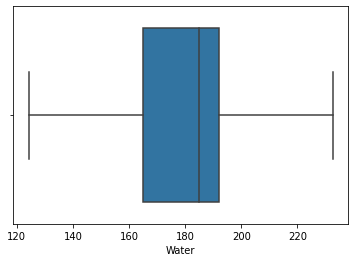

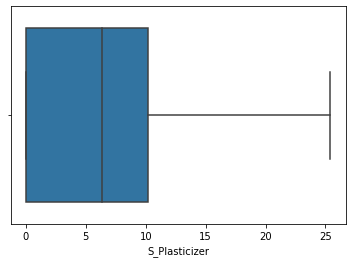

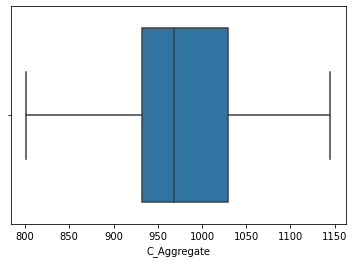

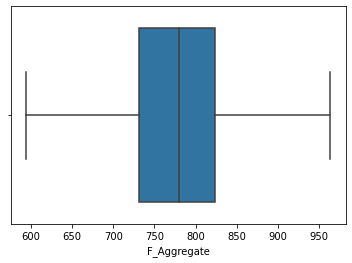

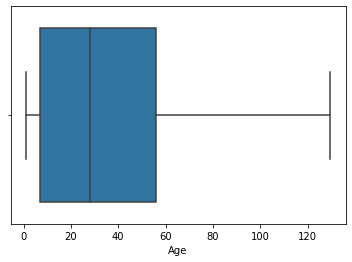

In [15]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])

### Observations:

1. After replacing outliers with lower and upper bound values, there are outliers in the dataset.

# Perform univariate analysis (be as creative as possible in your analysis)

### Visualizing the distributions using Distplot and Boxplots

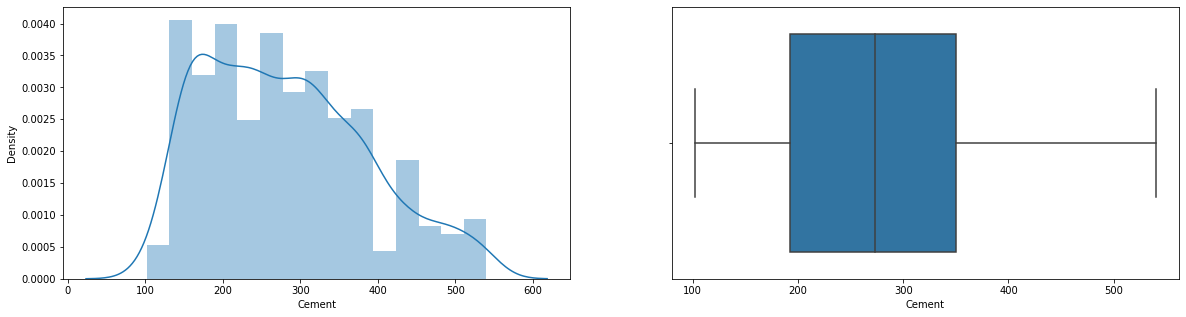

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Cement'])
plt.subplot(122)
sns.boxplot(df['Cement'])
plt.show()

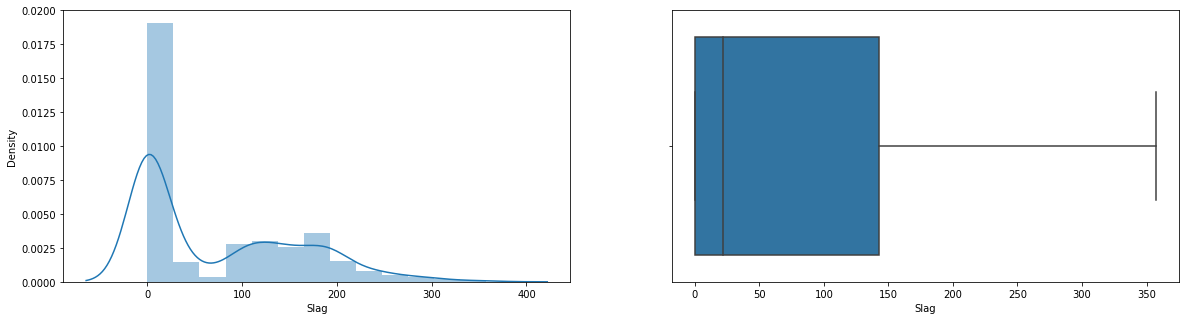

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Slag'])
plt.subplot(122)
sns.boxplot(df['Slag'])
plt.show()

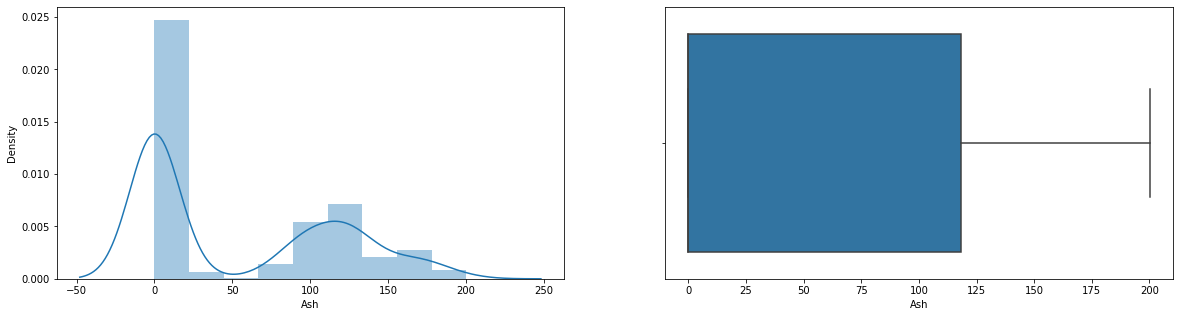

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Ash'])
plt.subplot(122)
sns.boxplot(df['Ash'])
plt.show()

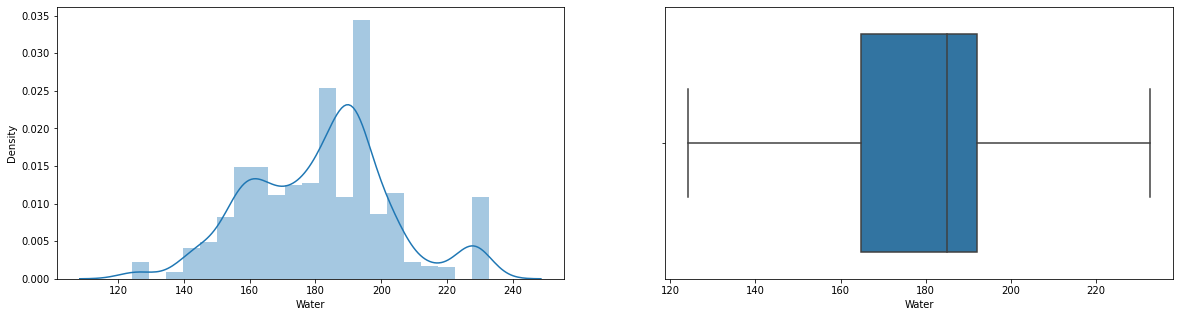

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Water'])
plt.subplot(122)
sns.boxplot(df['Water'])
plt.show()

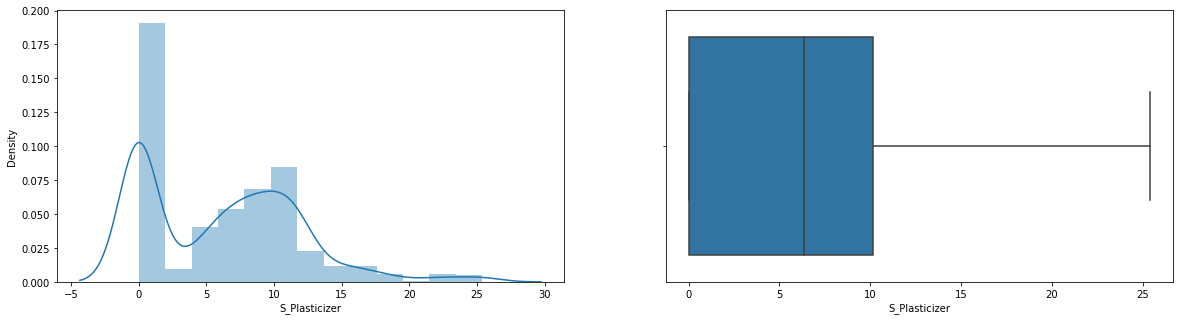

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['S_Plasticizer'])
plt.subplot(122)
sns.boxplot(df['S_Plasticizer'])
plt.show()

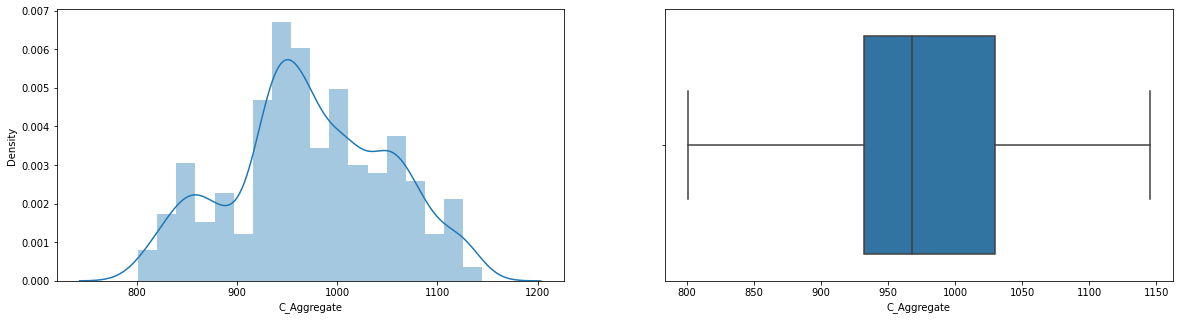

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['C_Aggregate'])
plt.subplot(122)
sns.boxplot(df['C_Aggregate'])
plt.show()

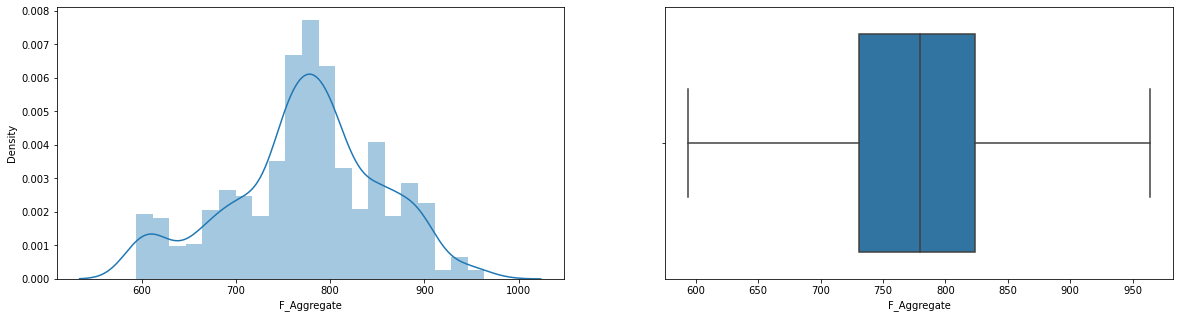

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['F_Aggregate'])
plt.subplot(122)
sns.boxplot(df['F_Aggregate'])
plt.show()

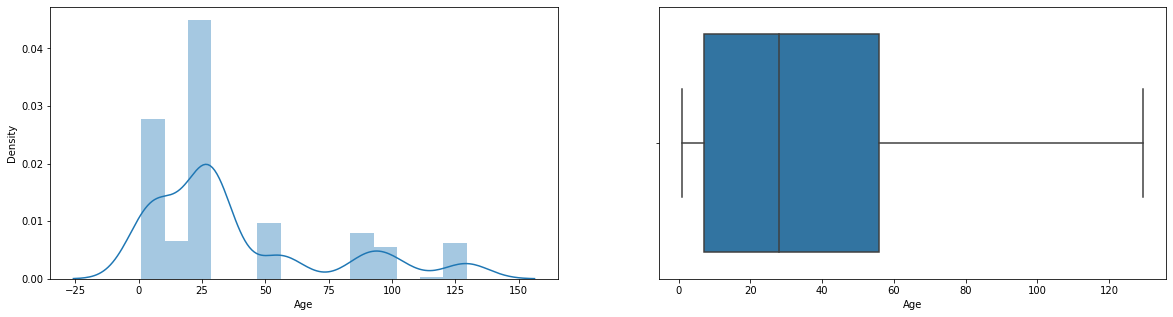

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['Age'])
plt.subplot(122)
sns.boxplot(df['Age'])
plt.show()

### Why is normal Distribution important for Data?

* The normal distribution is important because of central limit theorem. If you have many indepndent variables that may be generated by all kinds of distributions, the aggregate of those variables will tend towards a normal distribution. Another advantage is that the normal distribution makes math easy. For these reasons, even if the distribution is not actually normal,it is usful to assume that it is normal to get a good, first-order understanding of a set of data.<br>


* In Machine Learning, data satisfying Normal Distribution is beneficial for model building. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal. Also, Sigmoid functions work most naturally with normally distributed data.

### Is every feature variable normally distributed?

* <b>Cement, Water, C_Aggregate, F_Aggregate </b> features looks similar to have a normal distribution. Remaining features are not normally distributed.

### Is the data distribution skewed? If highly skewed, do you still find outliers which you did not treat?

* <b>Slag, Ash, S_Plasicizer, Age</b> features are right skewed.
* <b>Cement</b> is slightly skewed towards right. 
* <b>Water, F_Aggregate</b> are slightly skewed towards left. 
* Eventhough, they are skewed, there are no outliers left, after replacing those outliers with Lower and Upper bound values

### How do the distributions look in terms of variation? Which features are widely spread and which are kind of concentrated towards the mean?

* <b> Slag, S_Plasticizer, Age</b> features have high variation (These features have values, more than 3$\sigma$ away from their mean value). Remaining features have values within 3$\sigma$.
* <b>Cement, Water, C_Aggregate, F_Aggregate</b> features are concentrated around the mean.
* <b>Cement, Slag, C_Aggregate, F_Aggregate, Age</b> features are widely spreaded.

# Perform bi-variate analysis (be as creative as possible)

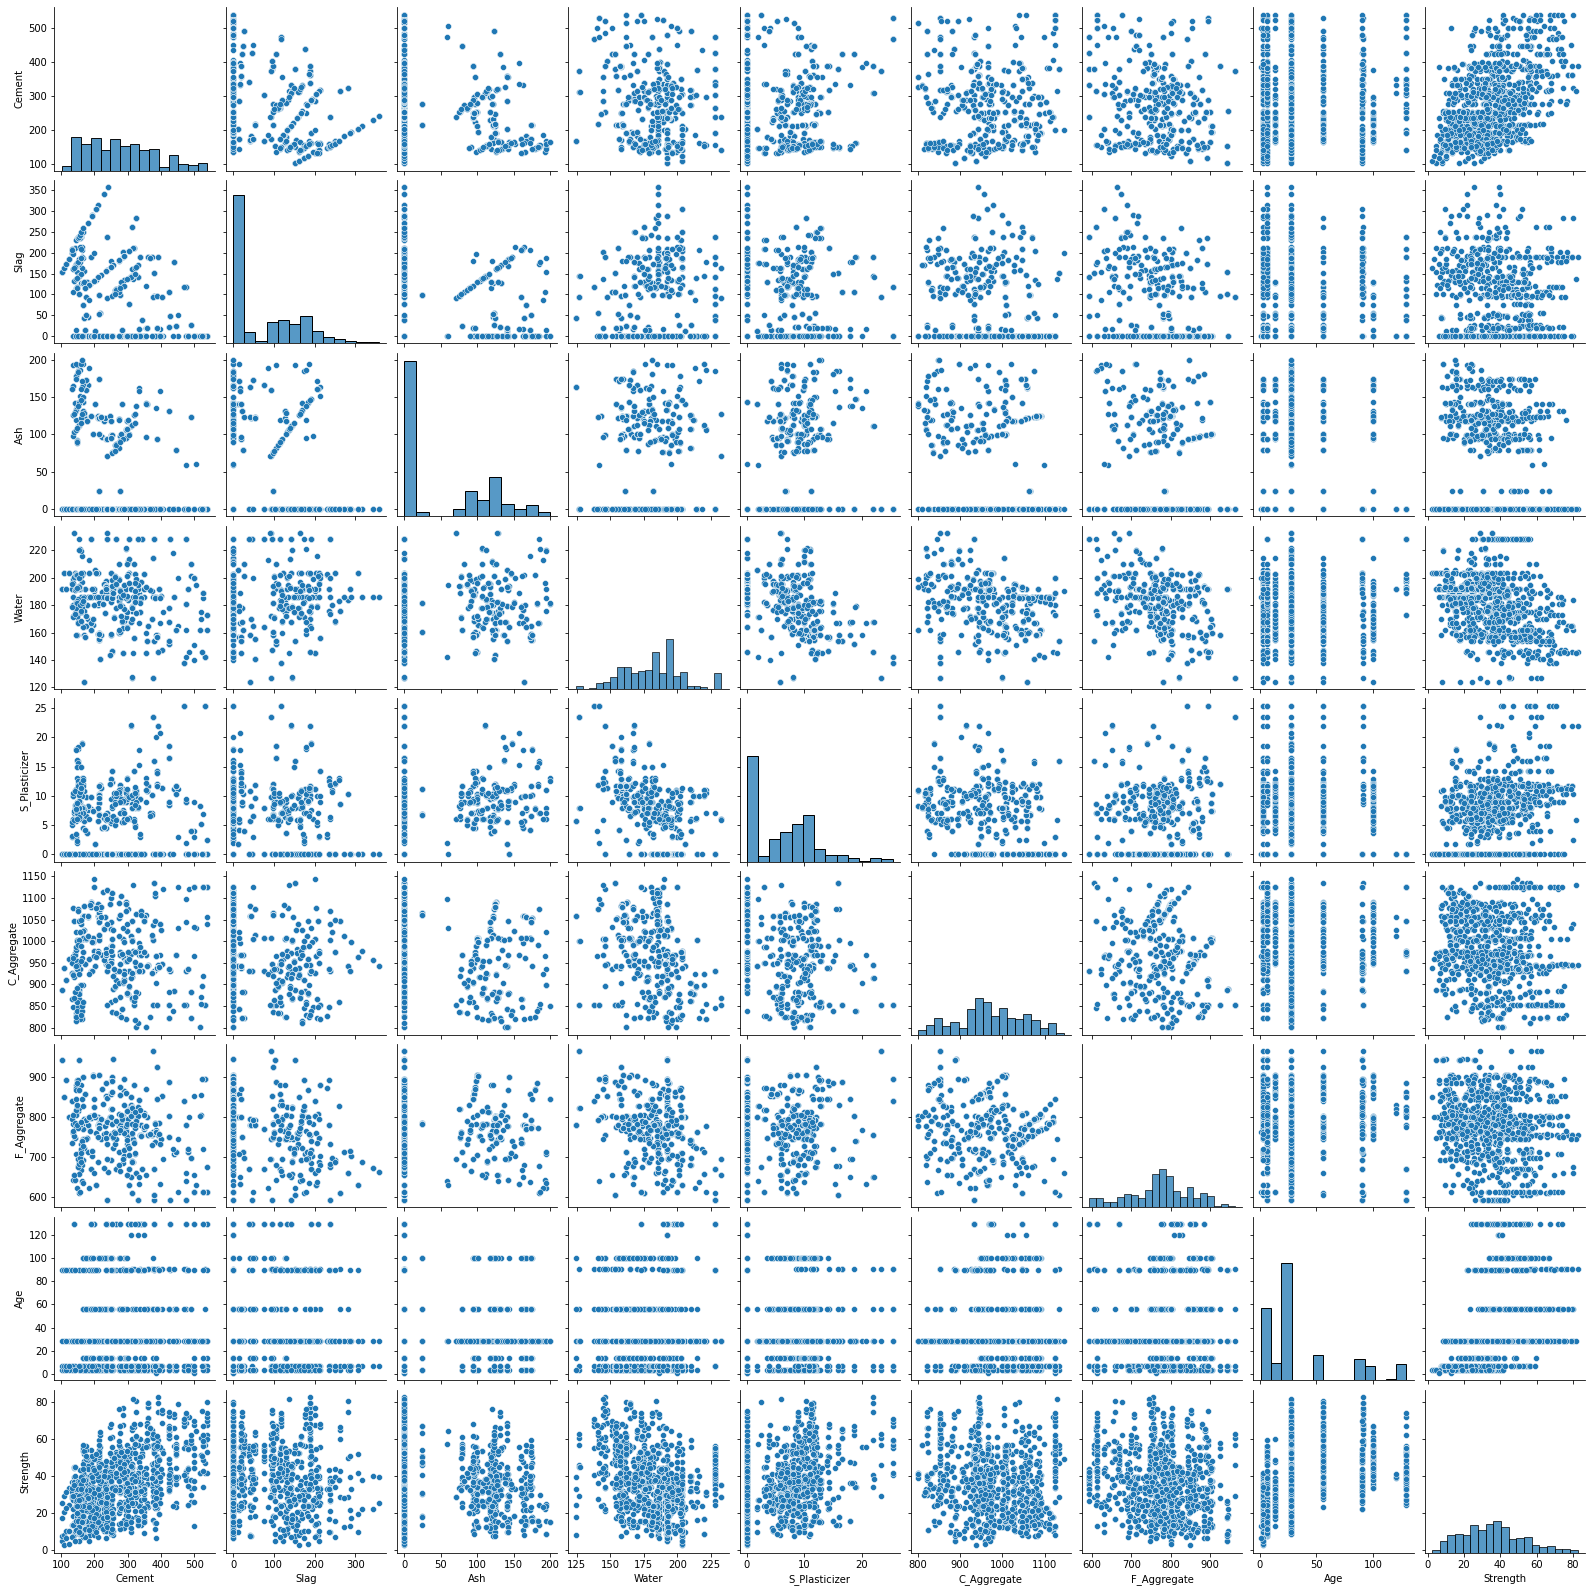

In [24]:
sns.pairplot(df)

<AxesSubplot:>

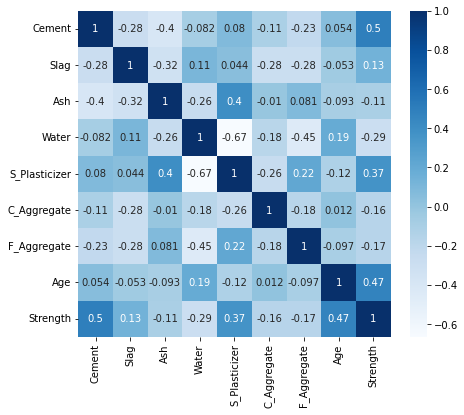

In [25]:
plt.figure(figsize=(7,6))
sns.heatmap(data=df.corr(),annot=True,cmap='Blues')

### See if there are variables which are strongly or weakly related

* Cement, Age are highly correlated to concrete strength, followed by S_Plasticizer.
* Cement, Slag, S_Plasticizer, Age are positively correlated with concrete srength.
* Ash, Water, C_Aggregate, F_Aggregate are negatively correlated with concrete strength.

### If there are variables showing high correlation, what corrective action is needed? 

* If we have multicollinearity among the independent variables, we can deal with this problem in many ways. The following are the methods mostly used.
    1. Simply Deleting the feature which is highly correlated with remaining features.
    2. Using a dimentionality reduction algorithms like Principle Component Analysis(PCA).

### Why is this matter of concern?

* Multicollinearity exists when an independent variable is highly correlated with one or more of the other independent variables.
* This is problem, as it alters the statistical significance or importance in determining the parameters of the model while training.

### What if we do not treat the variables showing high degree of correlation?

* If we have features which are highly correlated with other independent features, and trained a model with these independent variables, it makes hard to interpret coefficients of the features.
* This makes the model less reliable as the model fails to intrepret the actual significance of the independent features.

# What is the type of machine learning problem at hand? (Supervised or Unsupervised?) Why?

### Supervised Machine Learning Model

 Supervised learning describes a class of problems that involves using a model to learn a relationship between independent variables and dependent target variable. If the data used to train a model comprises of both independent and dependent variables, then that model is said to be a supervised Machine Learning model.
 
### Unsupervised Machine Learning Model

 Unsupervised Learning is a class of problems in which we cannot predict the output of the model. In this type of learning,we gave the model an unlabelled data and let the model to learn patterns from the data itself.
 
 
The data we have is labelled. We have independent and dependent variables. So, this comes under <b>Supervised Machine Learning</b> .

# What is the category of the machine learning problem at hand? (Classification or Regression?) Why?

### Classification Machine Learning


Classification is a Supervised Machine Learning Technique. This type of Algorithm is used to identify the category to which the new observation belongs to, based on the training data. This algorithm classifies the new observation into one of the classes in the target Feature.

### Regression Machine Learning


Regression is also a Supervised Machine Learning Technique. This type of Algorithm is used to predict continuous values.The model is trained with labelled data. During trainig phase the model learns parameters and uses these parameters to predict the value for new observation.


* The Problem at hand is <b>Regression</b> problem. In this problem we have to train a model to predict Concrete Strength.

## Pick each of the algorithm and perform the below steps:
1. Split your data between train and test steps.
2. Build your model
3. List down the evaluation metrics you would use to evaluate the performance of the model?
4. Evaluate the model on training data
5. Predict the response variables for the test data
6. How are the two scores? Are they significantly different? Are they the same? Is the test score better than training score?
7. Perform hyper parameter tuning and cross validation techniques.
8. Evaluate the model on test data.

In [26]:
X=df.drop('Strength',axis=1)
y=df['Strength']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
scaled_X=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(scaled_X,columns=X.columns)
X_scaled_df

,Cement,Slag,Ash,Water,S_Plasticizer,C_Aggregate,F_Aggregate,Age
0,2.477918,-0.856970,-0.847132,-0.921150,-0.630864,0.863160,-1.221395,-0.281572
1,2.477918,-0.856970,-0.847132,-0.921150,-0.630864,1.056170,-1.221395,-0.281572
2,0.491443,0.795698,-0.847132,2.189796,-1.062193,-0.526514,-2.249273,2.556406
3,0.491443,0.795698,-0.847132,2.189796,-1.062193,-0.526514,-2.249273,2.556406
4,-0.790432,0.678561,-0.847132,0.492916,-1.062193,0.070531,0.652603,2.556406
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488360,0.564569,-0.091564,0.473339,-1.323003,-0.064405,-0.281572
1026,0.392837,-0.856970,0.960095,0.681459,0.732137,-1.994679,0.500928,-0.281572
1027,-1.270057,0.759745,0.850661,0.525911,-0.009750,-1.036061,0.082256,-0.281572
1028,-1.168580,1.308315,-0.847132,-0.280106,0.887415,0.214646,0.193818,-0.281572


### Splitting Data into Training and Testing Data sets

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled_df,y,test_size=0.2,random_state=1)

In [30]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(824, 8) (206, 8)
(824,) (206,)


### List down the evaluation metrics you would use to evaluate the performance of the model?

<b>1. Mean Squared Error (MSE) :</b><br>
It is Mean of the squares of residues. Residue is the difference between actual value and predicted value.


<b>2. Root Mean Squared Error (RMSE) :</b><br>
It is the square root of the mean squared error.


<b>3. Mean Absolute Error (MAE) :</b><br>
It is the mean of the absolute values of the residues.


<b>4. Coefficient of Determination ($R^2$):</b><br>
Coefficient of determination explains how much of the variance for the dependent or target variable is explained by the independent variables in the regression model.

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [32]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
print('MSE for training data : ',mean_squared_error(y_train,linear_model.predict(x_train)))
print('RMSE for training data : ',(mean_squared_error(y_train,linear_model.predict(x_train)))**0.5)
print('MAE for training data : ',mean_absolute_error(y_train,linear_model.predict(x_train)))
print('R2 value for training data : ',r2_score(y_train,linear_model.predict(x_train)))

MSE for training data :  72.55483591776739
RMSE for training data :  8.517912650278083
MAE for training data :  6.587777159364918
R2 value for training data :  0.7431651130802251


In [35]:
y_pred=linear_model.predict(x_test)

In [36]:
print('MSE for testing data : ',mean_squared_error(y_test,y_pred))
print('RMSE for testing data : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE for testing data : ',mean_absolute_error(y_test,y_pred))
print('R2 value for testing data : ',r2_score(y_test,y_pred))

MSE for testing data :  89.21242424272435
RMSE for testing data :  9.445232884515043
MAE for testing data :  7.3860039856654485
R2 value for testing data :  0.657791714991907


In [37]:
r2_df=pd.DataFrame(index=['Accuracy for Training Data','Accuracy for Testing Data','Accuracy with Hyperparameters'])
r2_df['Linear Regression']=[r2_score(y_train,linear_model.predict(x_train)),r2_score(y_test,y_pred),None]
r2_df

,Linear Regression
Accuracy for Training Data,0.743165
Accuracy for Testing Data,0.657792
Accuracy with Hyperparameters,NaN


## Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
lasso_model=Lasso()

In [39]:
lasso_model.fit(x_train,y_train)

Lasso()

In [40]:
print('MSE for training data : ',mean_squared_error(y_train,lasso_model.predict(x_train)))
print('RMSE for training data : ',(mean_squared_error(y_train,lasso_model.predict(x_train)))**0.5)
print('MAE for training data : ',mean_absolute_error(y_train,lasso_model.predict(x_train)))
print('R2 value for training data : ',r2_score(y_train,lasso_model.predict(x_train)))

MSE for training data :  85.18973757899869
RMSE for training data :  9.22982868632992
MAE for training data :  7.312480322469126
R2 value for training data :  0.6984391689256171


In [41]:
y_pred=lasso_model.predict(x_test)

In [42]:
print('MSE for testing data : ',mean_squared_error(y_test,y_pred))
print('RMSE for testing data : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE for testing data : ',mean_absolute_error(y_test,y_pred))
print('R2 value for testing data : ',r2_score(y_test,y_pred))

MSE for testing data :  90.16377843522459
RMSE for testing data :  9.495460938533979
MAE for testing data :  7.490826301831749
R2 value for testing data :  0.6541424330738976


### Hyperparameter tuning for Lasso regression

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
h_para={'alpha':np.linspace(0,5,100)}

In [45]:
rscv=RandomizedSearchCV(Lasso(),param_distributions=h_para,cv=5,scoring ='r2',random_state=1)
result=rscv.fit(X_scaled_df,y)

In [46]:
result.best_params_

{'alpha': 0.8585858585858586}

In [47]:
result.best_score_

0.551592632187873

### Building Lasso regression model with Hyperparameter

In [48]:
lasso_tuned_model=Lasso(alpha= 0.8585858585858586)

In [49]:
lasso_tuned_model.fit(x_train,y_train)
y_pred_tuned=lasso_tuned_model.predict(x_test)

In [50]:
print('MSE for best hyperparameters : ',mean_squared_error(y_test,y_pred_tuned))
print('RMSE for best hyperparameters : ',(mean_squared_error(y_test,y_pred_tuned))**0.5)
print('MAE for best hyperparameters : ',mean_absolute_error(y_test,y_pred_tuned))
print('R2 value for best hyperparameters : ',r2_score(y_test,y_pred_tuned))

MSE for best hyperparameters :  88.59340902625853
RMSE for best hyperparameters :  9.412407185532217
MAE for best hyperparameters :  7.425624310408056
R2 value for best hyperparameters :  0.6601661839901303


In [51]:
r2_df['Lasso Regression']=[r2_score(y_train,lasso_model.predict(x_train)),r2_score(y_test,y_pred),r2_score(y_test,y_pred_tuned)]
r2_df

,Linear Regression,Lasso Regression
Accuracy for Training Data,0.743165,0.698439
Accuracy for Testing Data,0.657792,0.654142
Accuracy with Hyperparameters,NaN,0.660166


## Ridge regression

In [52]:
from sklearn.linear_model import Ridge
ridge_model=Ridge()

In [53]:
ridge_model.fit(x_train,y_train)

Ridge()

In [54]:
print('MSE for training data : ',mean_squared_error(y_train,ridge_model.predict(x_train)))
print('RMSE for training data : ',(mean_squared_error(y_train,ridge_model.predict(x_train)))**0.5)
print('MAE for training data : ',mean_absolute_error(y_train,ridge_model.predict(x_train)))
print('R2 value for training data : ',r2_score(y_train,ridge_model.predict(x_train)))

MSE for training data :  72.5605305010174
RMSE for training data :  8.518246914771689
MAE for training data :  6.588601847001204
R2 value for training data :  0.7431449549801266


In [55]:
y_pred=ridge_model.predict(x_test)

In [56]:
print('MSE for testing data : ',mean_squared_error(y_test,y_pred))
print('RMSE for testing data : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE for testing data : ',mean_absolute_error(y_test,y_pred))
print('R2 value for testing data : ',r2_score(y_test,y_pred))

MSE for testing data :  89.10062337708163
RMSE for testing data :  9.439312653847294
MAE for testing data :  7.382933733424822
R2 value for testing data :  0.6582205698607079


### Hyperparameter tuning for Ridge regression

In [57]:
h_para={'alpha':np.linspace(0,5,100)}

In [58]:
rscv=RandomizedSearchCV(Ridge(),param_distributions=h_para,cv=5,scoring ='r2',random_state=1)
result=rscv.fit(X_scaled_df,y)

In [59]:
result.best_params_

{'alpha': 4.696969696969697}

In [60]:
result.best_score_

0.6067506485826909

### Building Ridge regression model with Hyperparameter

In [61]:
ridge_tuned_model=Ridge(alpha= 4.696969696969697)

In [62]:
ridge_tuned_model.fit(x_train,y_train)
y_pred_tuned=ridge_tuned_model.predict(x_test)

In [63]:
print('MSE for best hyperparameters : ',mean_squared_error(y_test,y_pred_tuned))
print('RMSE for best hyperparameters : ',(mean_squared_error(y_test,y_pred_tuned))**0.5)
print('MAE for best hyperparameters : ',mean_absolute_error(y_test,y_pred_tuned))
print('R2 value for best hyperparameters : ',r2_score(y_test,y_pred_tuned))

MSE for best hyperparameters :  88.78614554344419
RMSE for best hyperparameters :  9.422640051675762
MAE for best hyperparameters :  7.379063180989491
R2 value for best hyperparameters :  0.6594268695553482


In [64]:
r2_df['Ridge Regression']=[r2_score(y_train,ridge_model.predict(x_train)),r2_score(y_test,y_pred),r2_score(y_test,y_pred_tuned)]
r2_df

,Linear Regression,Lasso Regression,Ridge Regression
Accuracy for Training Data,0.743165,0.698439,0.743145
Accuracy for Testing Data,0.657792,0.654142,0.658221
Accuracy with Hyperparameters,NaN,0.660166,0.659427


## Decision Tree regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model=DecisionTreeRegressor()

In [66]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [67]:
print('MSE for training data : ',mean_squared_error(y_train,decision_tree_model.predict(x_train)))
print('RMSE for training data : ',(mean_squared_error(y_train,decision_tree_model.predict(x_train)))**0.5)
print('MAE for training data : ',mean_absolute_error(y_train,decision_tree_model.predict(x_train)))
print('R2 value for training data : ',r2_score(y_train,decision_tree_model.predict(x_train)))

MSE for training data :  0.9471768401027623
RMSE for training data :  0.9732301064510707
MAE for training data :  0.10381132209842868
R2 value for training data :  0.99664711450941


In [68]:
y_pred=decision_tree_model.predict(x_test)

In [69]:
print('MSE for testing data : ',mean_squared_error(y_test,y_pred))
print('RMSE for testing data : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE for testing data : ',mean_absolute_error(y_test,y_pred))
print('R2 value for testing data : ',r2_score(y_test,y_pred))

MSE for testing data :  61.020248562019006
RMSE for testing data :  7.811545849703438
MAE for testing data :  4.923447149045307
R2 value for testing data :  0.7659335592723896


### Hyperparameter tuning for Decision Tree regressor

In [70]:
h_para={'criterion':["mse", "friedman_mse", "mae", "poisson"],
    'splitter':["best", "random"],
    'max_depth':[1,3,5,7,10],
    'min_samples_split':[2,5,10,20,50],
    'max_features':["auto", "sqrt", "log2",'None'],
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

In [71]:
rscv=RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=h_para,cv=5,scoring ='r2',random_state=1)
result=rscv.fit(X_scaled_df,y)

In [72]:
result.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'max_leaf_nodes': 10,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'mse'}

In [73]:
result.best_score_

0.15886278597082767

### Building Decision Tree Regressor model with Hyperparameter

In [74]:
decision_tree_tuned_model=DecisionTreeRegressor(splitter= 'random',
 min_samples_split= 10,
 max_leaf_nodes= 20,
 max_features= 'auto',
 max_depth= 7,
 criterion= 'friedman_mse')

In [75]:
decision_tree_tuned_model.fit(x_train,y_train)
y_pred_tuned=decision_tree_tuned_model.predict(x_test)

In [76]:
print('MSE for best hyperparameters : ',mean_squared_error(y_test,y_pred_tuned))
print('RMSE for best hyperparameters : ',(mean_squared_error(y_test,y_pred_tuned))**0.5)
print('MAE for best hyperparameters : ',mean_absolute_error(y_test,y_pred_tuned))
print('R2 value for best hyperparameters : ',r2_score(y_test,y_pred_tuned))

MSE for best hyperparameters :  107.7739739496392
RMSE for best hyperparameters :  10.381424466307077
MAE for best hyperparameters :  7.861339061343787
R2 value for best hyperparameters :  0.586591810424648


In [77]:
r2_df['Decision Tree']=[r2_score(y_train,decision_tree_model.predict(x_train)),r2_score(y_test,y_pred),r2_score(y_test,y_pred_tuned)]
r2_df

,Linear Regression,Lasso Regression,Ridge Regression,Decision Tree
Accuracy for Training Data,0.743165,0.698439,0.743145,0.996647
Accuracy for Testing Data,0.657792,0.654142,0.658221,0.765934
Accuracy with Hyperparameters,NaN,0.660166,0.659427,0.586592


## Random forest regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model=RandomForestRegressor()

In [79]:
random_forest_model.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
print('MSE for training data : ',mean_squared_error(y_train,random_forest_model.predict(x_train)))
print('RMSE for training data : ',(mean_squared_error(y_train,random_forest_model.predict(x_train)))**0.5)
print('MAE for training data : ',mean_absolute_error(y_train,random_forest_model.predict(x_train)))
print('R2 value for training data : ',r2_score(y_train,random_forest_model.predict(x_train)))

MSE for training data :  4.131528780857984
RMSE for training data :  2.0326162404295562
MAE for training data :  1.3255294945359621
R2 value for training data :  0.9853749138315175


In [81]:
y_pred=random_forest_model.predict(x_test)

In [82]:
print('MSE for testing data : ',mean_squared_error(y_test,y_pred))
print('RMSE for testing data : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE for testing data : ',mean_absolute_error(y_test,y_pred))
print('R2 value for testing data : ',r2_score(y_test,y_pred))

MSE for testing data :  26.984721622471735
RMSE for testing data :  5.194682052105955
MAE for testing data :  3.6469294346078343
R2 value for testing data :  0.8964898063668529


### Hyperparameter tuning for Random Forest  regressor

In [83]:
h_para={'criterion':["mse", "mae"],
    'n_estimators':[10,20,50],
    'max_depth':[1,3,5,7,10,20,30,40,None],
    'min_samples_split':[2,5,10],
    'max_features':["auto", "sqrt", "log2",None],
    'max_leaf_nodes':[10,20,30,40,50],
       'bootstrap':[True,False]}

In [84]:
rscv=RandomizedSearchCV(RandomForestRegressor(),param_distributions=h_para,cv=5,scoring ='r2',random_state=1)
result=rscv.fit(X_scaled_df,y)

In [85]:
result.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'max_leaf_nodes': 50,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'mse',
 'bootstrap': False}

In [86]:
result.best_score_

0.27073344025164514

### Building Random Foresr Regressor model with Hyperparameter

In [87]:
random_forest_tuned=RandomForestRegressor(n_estimators= 10,
 min_samples_split= 2,
 max_leaf_nodes=30,
 max_features= 'sqrt',
 max_depth=30,
 criterion= 'mae',
 bootstrap= True)

In [88]:
random_forest_tuned.fit(x_train,y_train)
y_pred_tuned=random_forest_tuned.predict(x_test)

In [89]:
print('MSE for best hyperparameters : ',mean_squared_error(y_test,y_pred_tuned))
print('RMSE for best hyperparameters : ',(mean_squared_error(y_test,y_pred_tuned))**0.5)
print('MAE for best hyperparameters : ',mean_absolute_error(y_test,y_pred_tuned))
print('R2 value for best hyperparameters : ',r2_score(y_test,y_pred_tuned))

MSE for best hyperparameters :  55.478793032358105
RMSE for best hyperparameters :  7.448408758409953
MAE for best hyperparameters :  5.633044428687491
R2 value for best hyperparameters :  0.7871899258530626


In [90]:
r2_df['Randon Forest']=[r2_score(y_train,random_forest_model.predict(x_train)),r2_score(y_test,y_pred),r2_score(y_test,y_pred_tuned)]
r2_df

,Linear Regression,Lasso Regression,Ridge Regression,Decision Tree,Randon Forest
Accuracy for Training Data,0.743165,0.698439,0.743145,0.996647,0.985375
Accuracy for Testing Data,0.657792,0.654142,0.658221,0.765934,0.896490
Accuracy with Hyperparameters,NaN,0.660166,0.659427,0.586592,0.787190


## KNN regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor()

In [92]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [93]:
print('MSE for training data : ',mean_squared_error(y_train,knn_model.predict(x_train)))
print('RMSE for training data : ',(mean_squared_error(y_train,knn_model.predict(x_train)))**0.5)
print('MAE for training data : ',mean_absolute_error(y_train,knn_model.predict(x_train)))
print('R2 value for training data : ',r2_score(y_train,knn_model.predict(x_train)))

MSE for training data :  37.51399944826072
RMSE for training data :  6.124867300461351
MAE for training data :  4.692304583465895
R2 value for training data :  0.8672052154163424


In [94]:
y_pred=knn_model.predict(x_test)

In [95]:
print('MSE for testing data : ',mean_squared_error(y_test,y_pred))
print('RMSE for testing data : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE for testing data : ',mean_absolute_error(y_test,y_pred))
print('R2 value for testing data : ',r2_score(y_test,y_pred))

MSE for testing data :  74.79071990819396
RMSE for testing data :  8.648162805370513
MAE for testing data :  6.418609500057223
R2 value for testing data :  0.713111663408351


### Hyperparameter tuning for KNeighbor regressor

In [96]:
h_para={'n_neighbors':np.arange(1,21)}

In [97]:
rscv=RandomizedSearchCV(KNeighborsRegressor(),param_distributions=h_para,cv=5,scoring ='r2',random_state=1)
result=rscv.fit(X_scaled_df,y)

In [98]:
result.best_params_

{'n_neighbors': 8}

In [99]:
result.best_score_

0.45874751971778666

### Building KNeighbor Regressor model with Hyperparameter

In [100]:
knn_tuned_model=KNeighborsRegressor(n_neighbors=8)
knn_tuned_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [101]:
y_pred_tuned=knn_tuned_model.predict(x_test)

In [102]:
print('MSE for best hyperparameters : ',mean_squared_error(y_test,y_pred_tuned))
print('RMSE for best hyperparameters : ',(mean_squared_error(y_test,y_pred_tuned))**0.5)
print('MAE for best hyperparameters : ',mean_absolute_error(y_test,y_pred_tuned))
print('R2 value for best hyperparameters : ',r2_score(y_test,y_pred_tuned))

MSE for best hyperparameters :  77.12152976071594
RMSE for best hyperparameters :  8.781886457972224
MAE for best hyperparameters :  6.611509620281138
R2 value for best hyperparameters :  0.7041709530859706


In [103]:
r2_df['KNN']=[r2_score(y_train,knn_model.predict(x_train)),r2_score(y_test,y_pred),r2_score(y_test,y_pred_tuned)]
r2_df

,Linear Regression,Lasso Regression,Ridge Regression,Decision Tree,Randon Forest,KNN
Accuracy for Training Data,0.743165,0.698439,0.743145,0.996647,0.985375,0.867205
Accuracy for Testing Data,0.657792,0.654142,0.658221,0.765934,0.896490,0.713112
Accuracy with Hyperparameters,NaN,0.660166,0.659427,0.586592,0.787190,0.704171


## SVM regressor

In [104]:
from sklearn.svm import SVR
svm_model=SVR()

In [105]:
svm_model.fit(x_train,y_train)

SVR()

In [106]:
print('MSE for training data : ',mean_squared_error(y_train,svm_model.predict(x_train)))
print('RMSE for training data : ',(mean_squared_error(y_train,svm_model.predict(x_train)))**0.5)
print('MAE for training data : ',mean_absolute_error(y_train,svm_model.predict(x_train)))
print('R2 value for training data : ',r2_score(y_train,svm_model.predict(x_train)))

MSE for training data :  73.6127414549907
RMSE for training data :  8.579786795427419
MAE for training data :  6.412244574692555
R2 value for training data :  0.7394202620914847


In [107]:
y_pred=svm_model.predict(x_test)

In [108]:
print('MSE for testing data : ',mean_squared_error(y_test,y_pred))
print('RMSE for testing data : ',(mean_squared_error(y_test,y_pred))**0.5)
print('MAE for testing data : ',mean_absolute_error(y_test,y_pred))
print('R2 value for testing data : ',r2_score(y_test,y_pred))

MSE for testing data :  88.08936993051495
RMSE for testing data :  9.385593744165307
MAE for testing data :  6.989463034931983
R2 value for testing data :  0.6620996182174319


### Hyperparameter tuning for Support Vector Regressor

In [109]:
h_para={'kernel':['linear','rbf'],
        'gamma' : ['scale', 'auto'],
        'C':np.linspace(0,1,5)}

In [110]:
rscv=RandomizedSearchCV(SVR(),param_distributions=h_para,cv=5,scoring ='r2',random_state=1)
result=rscv.fit(X_scaled_df,y)

In [111]:
result.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'C': 0.75}

In [112]:
result.best_score_

0.5894439124166174

### Building Support Vector Regressor model with Hyperparameter

In [113]:
svm_tuned_model=SVR(kernel='linear',gamma='auto',C=0.75)
svm_tuned_model.fit(x_train,y_train)

SVR(C=0.75, gamma='auto', kernel='linear')

In [114]:
y_pred_tuned=svm_tuned_model.predict(x_test)

In [115]:
print('MSE for best hyperparameters : ',mean_squared_error(y_test,y_pred_tuned))
print('RMSE for best hyperparameters : ',(mean_squared_error(y_test,y_pred_tuned))**0.5)
print('MAE for best hyperparameters : ',mean_absolute_error(y_test,y_pred_tuned))
print('R2 value for best hyperparameters : ',r2_score(y_test,y_pred_tuned))

MSE for best hyperparameters :  91.37826583663714
RMSE for best hyperparameters :  9.559197970365355
MAE for best hyperparameters :  7.397335428375059
R2 value for best hyperparameters :  0.6494838033557928


In [116]:
r2_df['SVM']=[r2_score(y_train,svm_model.predict(x_train)),r2_score(y_test,y_pred),r2_score(y_test,y_pred_tuned)]
r2_df

,Linear Regression,Lasso Regression,Ridge Regression,Decision Tree,Randon Forest,KNN,SVM
Accuracy for Training Data,0.743165,0.698439,0.743145,0.996647,0.985375,0.867205,0.739420
Accuracy for Testing Data,0.657792,0.654142,0.658221,0.765934,0.896490,0.713112,0.662100
Accuracy with Hyperparameters,NaN,0.660166,0.659427,0.586592,0.787190,0.704171,0.649484


### Observations :
 
* For all the models the testing and training accuracies are significantly different.
* From the above Experiment with different models, <b>Random Forest Regressor</b> gets me best accuracy (78.72 %) with best hyperparameters.